## Obdelava slik 

### 1. Uvod
V datasetu imamo 28373 shranjene glasbe. Za vsako imamo skranjenega autorja, ime glasbe, leto objave, žanr in še nekaj numeričnih podatkov, vse skupaj 30 podatkov.

### 2. Statistika


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from csv import DictReader
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
#Pridobivanje podatkov
musics = []

reader = DictReader(open('tcc_ceds_music.csv', 'rt', encoding='utf-8'))
for row in reader:
    artist = row["artist_name"]
    name   = row["track_name"]
    genre  = row["genre"]
    length = row["len"]
    topic  = row["topic"]
    sadness= row["sadness"]
    danceability= row["danceability"]
    energy= row["energy"]
    date = row["release_date"]
    musics.append([artist, name, date, genre, length, topic, sadness,danceability,energy])
    

Text(0.5, 0, 'Število glasb')

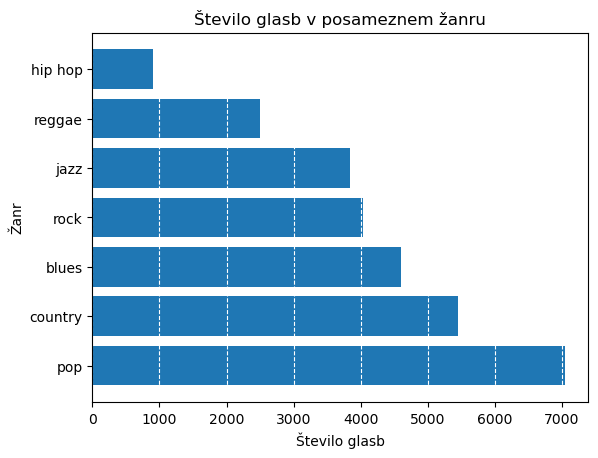

In [3]:
fig, ax = plt.subplots(1, 1)

temp = {}
for music in musics:
    if music[3] not in temp.keys():
        temp[music[3]] = 0
    temp[music[3]] += 1

temp = sorted(temp.items(), key=lambda x:x[1], reverse=True)
temp = dict(temp)

ax.xaxis.grid(color='white', linestyle='dashed')
ax.set_title("Število glasb v posameznem žanru")
ax.barh(list(temp.keys()), temp.values())
ax.set_ylabel("Žanr")
ax.set_xlabel("Število glasb")

Text(0.5, 0, 'Število glasb')

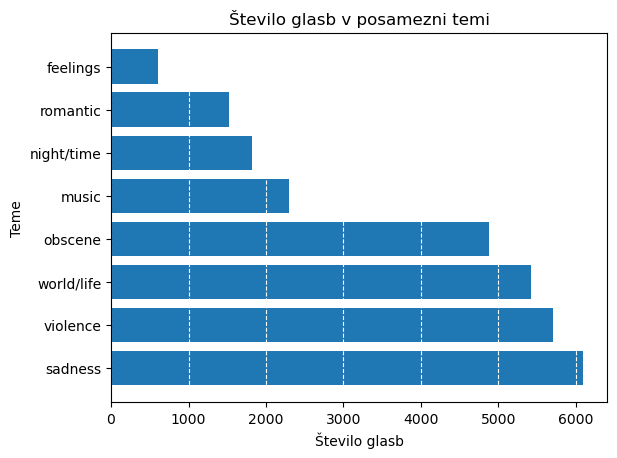

In [4]:
fig, ax = plt.subplots(1, 1)

temp = {}
for music in musics:
    if music[5] not in temp.keys():
        temp[music[5]] = 0
    temp[music[5]] += 1

temp = sorted(temp.items(), key=lambda x:x[1], reverse=True)
temp = dict(temp)

ax.xaxis.grid(color='white', linestyle='dashed')
ax.set_title("Število glasb v posamezni temi")
ax.barh(list(temp.keys()), temp.values())
ax.set_ylabel("Teme")
ax.set_xlabel("Število glasb")

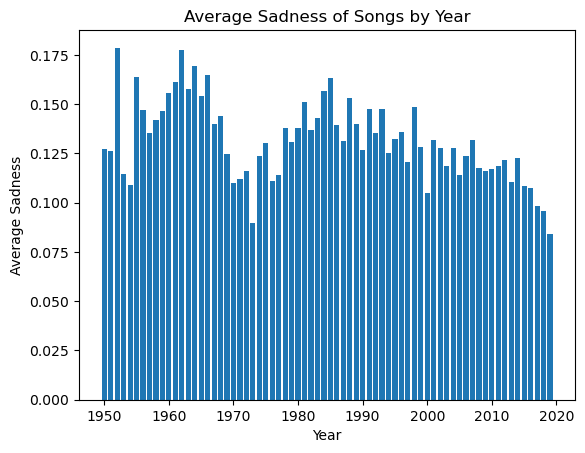

In [5]:
sadness_by_year = {}

for music in musics:
    year = int(music[2])
    sadness = float(music[6])
    if year in sadness_by_year:
        sadness_by_year[year]["total_sadness"] += sadness
        sadness_by_year[year]["count"] += 1
    else:
        sadness_by_year[year] = {"total_sadness": sadness, "count": 1}

avg_sadness_by_year = [(year, sadness_by_year[year]["total_sadness"] / sadness_by_year[year]["count"]) for year in sadness_by_year]

avg_sadness_by_year.sort(key=lambda x: x[0])

x_axis = [year for year, _ in avg_sadness_by_year]
y_axis = [sadness for _, sadness in avg_sadness_by_year]

plt.bar(x_axis, y_axis)

plt.title("Average Sadness of Songs by Year")
plt.xlabel("Year")
plt.ylabel("Average Sadness")

plt.show()

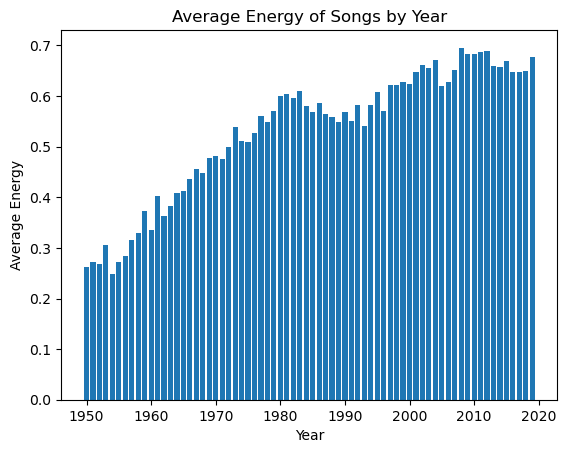

In [6]:
import matplotlib.pyplot as plt

energy_by_year = {}

for music in musics:
    year = int(music[2])
    energy = float(music[8])
    if year in energy_by_year:
        energy_by_year[year]["total_energy"] += energy
        energy_by_year[year]["count"] += 1
    else:
        energy_by_year[year] = {"total_energy": energy, "count": 1}

avg_energy_by_year = [(year, energy_by_year[year]["total_energy"] / energy_by_year[year]["count"]) for year in energy_by_year]

avg_energy_by_year.sort(key=lambda x: x[0])

x_axis = [year for year, _ in avg_energy_by_year]
y_axis = [energy for _, energy in avg_energy_by_year]

plt.bar(x_axis, y_axis)

plt.title("Average Energy of Songs by Year")
plt.xlabel("Year")
plt.ylabel("Average Energy")

plt.show()

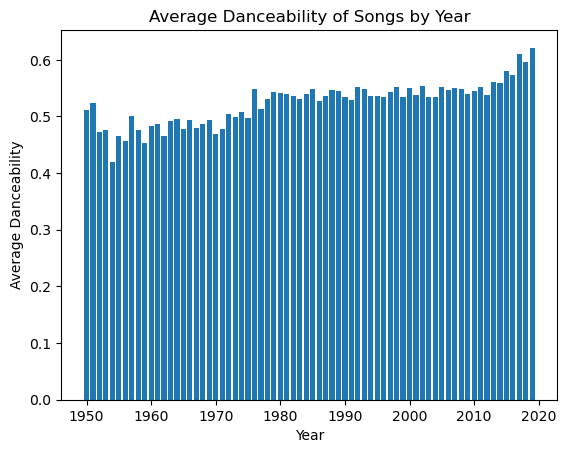

In [7]:
danceability_by_year = {}

for music in musics:
    year = int(music[2])
    danceability = float(music[7])
    if year in danceability_by_year:
        danceability_by_year[year]["total_danceability"] += danceability
        danceability_by_year[year]["count"] += 1
    else:
        danceability_by_year[year] = {"total_danceability": danceability, "count": 1}

avg_danceability_by_year = [(year, danceability_by_year[year]["total_danceability"] / danceability_by_year[year]["count"]) for year in danceability_by_year]

avg_danceability_by_year.sort(key=lambda x: x[0])

x_axis = [year for year, _ in avg_danceability_by_year]
y_axis = [danceability for _, danceability in avg_danceability_by_year]

plt.bar(x_axis, y_axis)

plt.title("Average Danceability of Songs by Year")
plt.xlabel("Year")
plt.ylabel("Average Danceability")

plt.show()

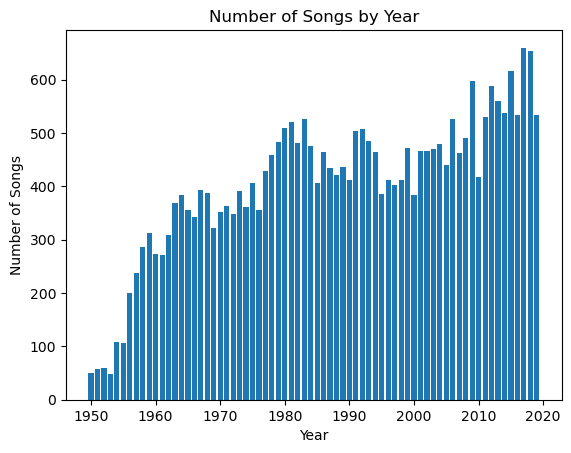

In [8]:
songs_by_year = {}

for music in musics:
    year = int(music[2])
    if year in songs_by_year:
        songs_by_year[year] += 1
    else:
        songs_by_year[year] = 1

x_axis = list(songs_by_year.keys())
y_axis = list(songs_by_year.values())

x_axis.sort()

plt.bar(x_axis, y_axis)

plt.title("Number of Songs by Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")

plt.show()

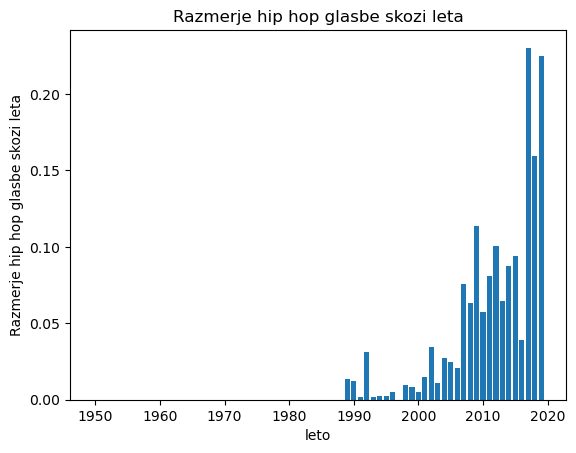

In [9]:
pop_songs_by_year = {}

for music in musics:
    year = int(music[2])
    genre = music[3]
    if year in pop_songs_by_year:
        pop_songs_by_year[year]["total_songs"] += 1
        if genre == "hip hop":
            pop_songs_by_year[year]["pop_songs"] += 1
    else:
        pop_songs_by_year[year] = {"total_songs": 1, "pop_songs": 0}
        if genre == "hip hop":
            pop_songs_by_year[year]["pop_songs"] = 1

x_axis = list(pop_songs_by_year.keys())
y_axis = [pop_songs_by_year[year]["pop_songs"] / pop_songs_by_year[year]["total_songs"] for year in x_axis]

x_axis.sort()

plt.bar(x_axis, y_axis)

plt.title("Razmerje hip hop glasbe skozi leta")
plt.xlabel("leto")
plt.ylabel("Razmerje hip hop glasbe skozi leta")

plt.show()

In [125]:
import pandas as pd
import random
from sklearn.linear_model import LinearRegression

pesmi = pd.read_csv('tcc_ceds_music.csv')


In [116]:
pesmi

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def predlagaj_pesem(pesmi_training):
    predict_max = 0
    pesem = pesmi.sample().iloc[0]
    xp = np.array(pesem[['len', 'dating', 'violence', 'world/life', 'night/time',
                            'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene',
                            'music', 'movement/places', 'light/visual perceptions', 'family/spiritual',
                            'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
                            'instrumentalness', 'valence', 'energy', 'age']])
    pesem_max=pesem
    i = 0
    while (i < 100):
        i += 1
        x = pesmi_training[['len', 'dating', 'violence', 'world/life', 'night/time',
                            'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene',
                            'music', 'movement/places', 'light/visual perceptions', 'family/spiritual',
                            'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
                            'instrumentalness', 'valence', 'energy', 'age']]
        y = pesmi_training['ocena']
        y = np.array(y).reshape(-1, 1)
        x = np.array(x).reshape(-1,24)

        lr = LinearRegression()
        lr.fit(x, y)

        pesem = pesmi.sample().iloc[0]

        xp = np.array(pesem[['len', 'dating', 'violence', 'world/life', 'night/time',
                              'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene',
                              'music', 'movement/places', 'light/visual perceptions', 'family/spiritual',
                              'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
                              'instrumentalness', 'valence', 'energy', 'age']])
        predict = lr.predict(xp.reshape(1, -1))
        if(predict_max<predict):
            predict_max=predict
            pesem_max=pesem
            print(predict)
    return pesem_max
    

pesem=pesmi.sample().iloc[0]
print(pesem['artist_name'], "-", pesem['track_name'])
ocena=input("Oceni pesem:")
pesem["ocena"]=ocena
pesmi_training=pd.DataFrame
pesmi_training=pesem[["len","dating","violence","world/life","night/time",
                       "shake the audience","family/gospel","romantic","communication","obscene",
                       "music","movement/places","light/visual perceptions","family/spiritual",
                       "like/girls","sadness","feelings","danceability","loudness","acousticness",
                       "instrumentalness","valence","energy","age","ocena"]]
i=0
while(i<5):
    i+=1
    pesem=pesmi.sample().iloc[0]
    print(pesem['artist_name'], "-", pesem['track_name'])    
    ocena=input("Oceni pesem:")
    pesem["ocena"]=ocena
    pesmi_training=pesmi_training.append(pesem[["len","dating","violence","world/life","night/time",
                                                 "shake the audience","family/gospel","romantic","communication","obscene",
                                                 "music","movement/places","light/visual perceptions","family/spiritual",
                                                 "like/girls","sadness","feelings","danceability","loudness","acousticness",
                                                 "instrumentalness","valence","energy","age","ocena"]])
i = 0
while i < 500:
    i += 1
    pesem = predlagaj_pesem(pesmi_training)
    print(pesem['artist_name'], "-", pesem['track_name'])
    ocena = input("Oceni pesem:")
    pesem["ocena"] = ocena  
    pesmi_training=pesmi_training.append(pesem[["len","dating","violence","world/life","night/time",
                                                 "shake the audience","family/gospel","romantic","communication","obscene",
                                                 "music","movement/places","light/visual perceptions","family/spiritual",
                                                 "like/girls","sadness","feelings","danceability","loudness","acousticness",
                                                 "instrumentalness","valence","energy","age","ocena"]])
    print(len(pesmi_training))



floetry - butterflies


In [ ]:
1